# Card Suit Classification #
We are trying to create a classification model which can classify the card's suit, whether it is a diamond, club, heart or spade. Limitation of this model is that the dataset is small, hence we need to find a way to increase its dataset (duplicate it maybe).

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
path=Path('data')
path.ls()

[PosixPath('data/diamond'),
 PosixPath('data/models'),
 PosixPath('data/export.pkl'),
 PosixPath('data/heart'),
 PosixPath('data/.ipynb_checkpoints'),
 PosixPath('data/spade'),
 PosixPath('data/club')]

# View Data #

In [4]:
np.random.seed(69)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)

In [30]:
var_x = get_transforms()[0][0]
var_x??

In [5]:
data.classes

['club', 'diamond', 'heart', 'spade']

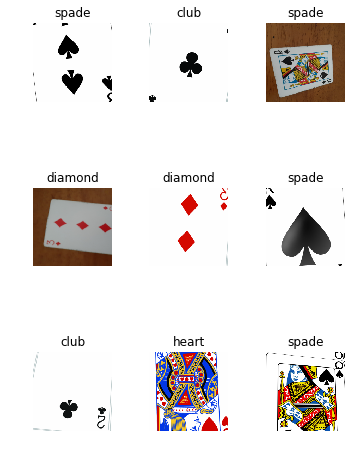

In [6]:
data.show_batch(rows=3, figsize=(5,7))

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [9]:
learn.fit_one_cycle(5, 0.01)

epoch,train_loss,valid_loss,error_rate,time
0,1.762190,1.104718,0.470588,00:42
1,1.190525,0.198819,0.058824,00:38
2,0.870015,0.076032,0.029412,00:42
3,0.694493,0.084814,0.029412,00:37
4,0.570967,0.090736,0.058824,00:38


We have about 34 testing dataset, fit for 8 times. 

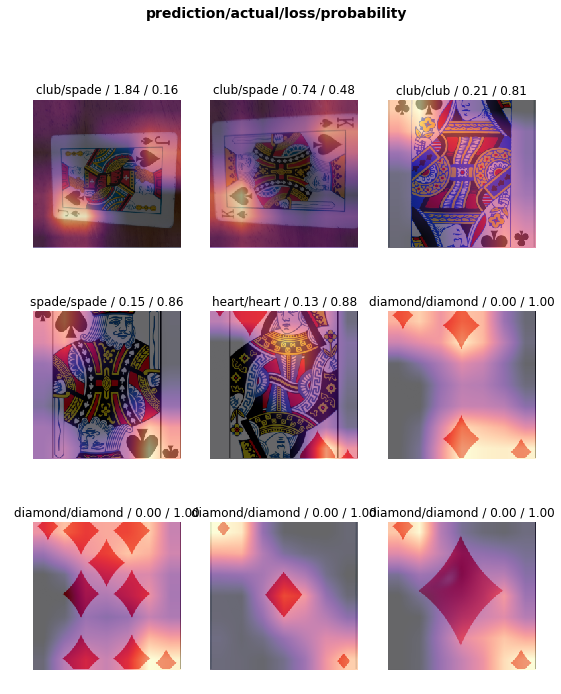

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(9,11))

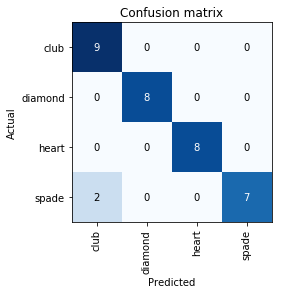

In [11]:
interp.plot_confusion_matrix()

In [12]:
learn.save('train')

In [16]:
learn.load('train')
learn.unfreeze()

In [17]:
learn.fit_one_cycle(5,slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.056319,0.064437,0.029412,00:41
1,0.081907,0.032359,0.000000,00:39
2,0.100216,0.046177,0.029412,00:40
3,0.092364,0.035053,0.029412,00:39
4,0.098872,0.017265,0.000000,00:39


In [18]:
learn.save('train-2')

In [24]:
learn.export()

Try the model

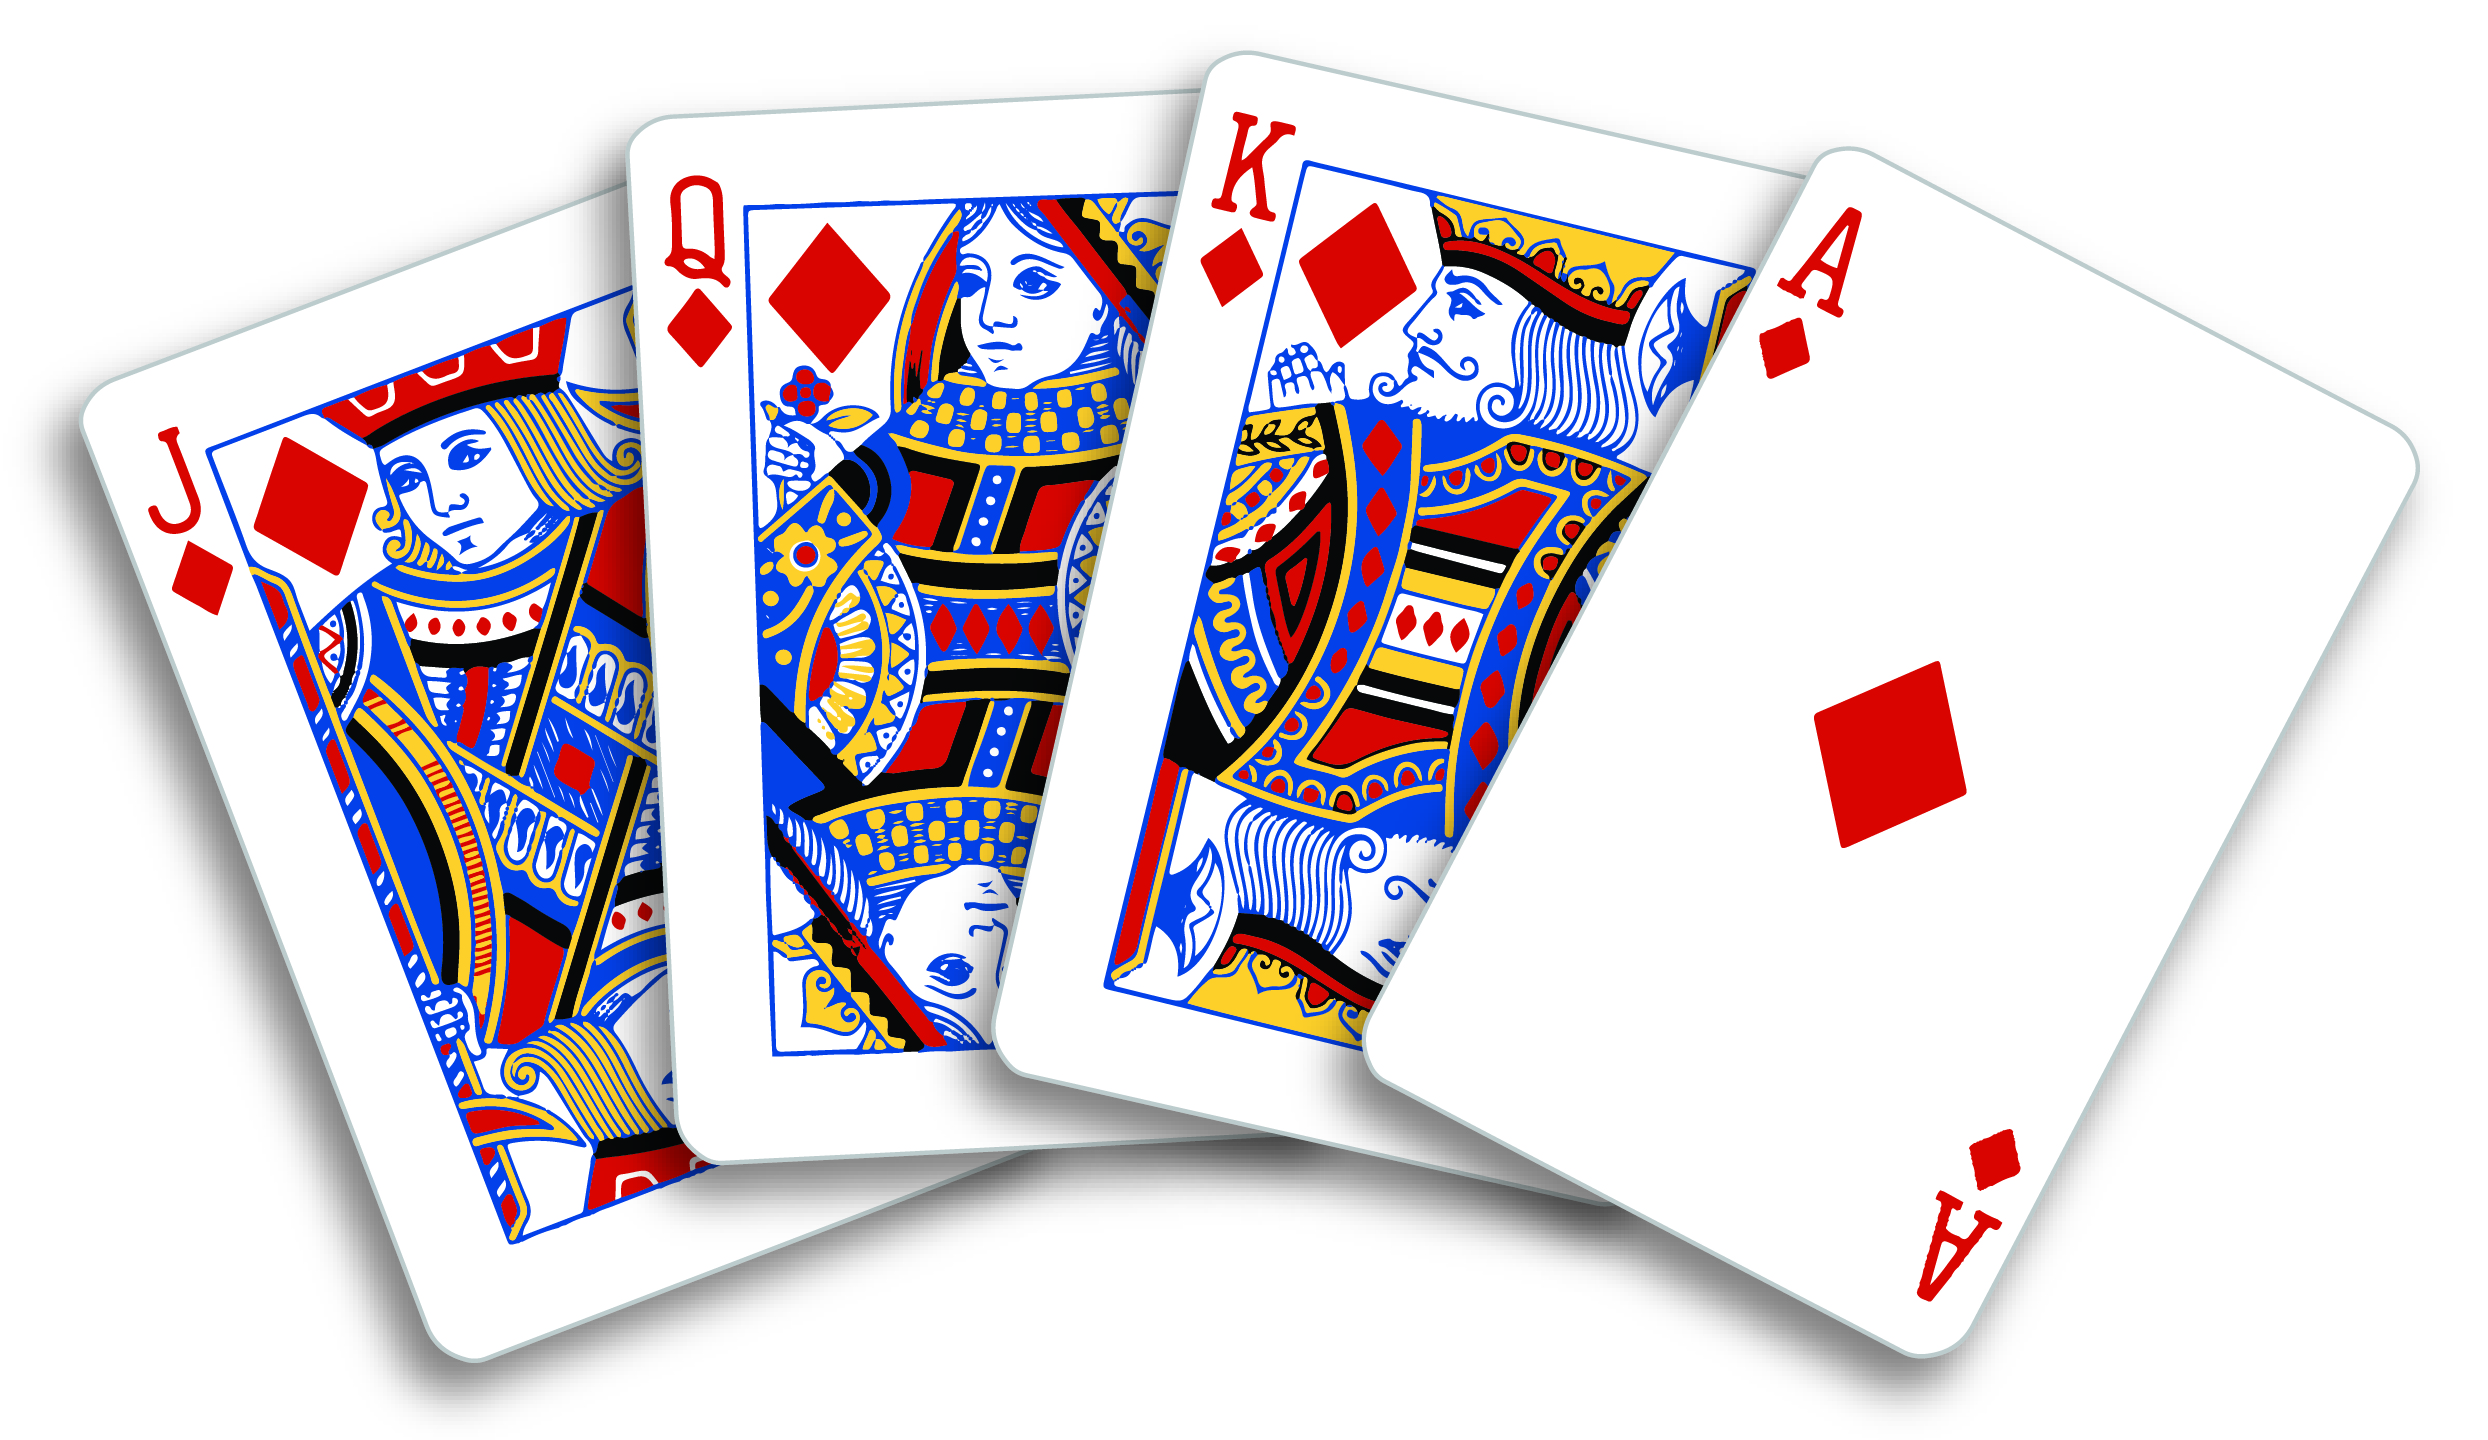

In [19]:
img = open_image(path/'diamond'/'honor_diamond.jpg')
img

In [17]:
learn = load_learner(path)

In [20]:
pred_class,pred_idx,outputs = learn.predict(img)

In [21]:
pred_class

Category diamond

In [22]:
pred_idx

tensor(1)

In [23]:
outputs
# Show probability of club, diamond, heart, spade

tensor([0.0232, 0.9547, 0.0143, 0.0078])